In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
path = './resultados/'
results_path = [f for f in listdir(path) if isfile(join(path, f)) and '.csv' in join(path, f) ]
len(results_path)

50

In [3]:
df = None
for result_path in results_path: 
    if df is None:
        df = pd.read_csv(join(path, result_path), sep=';')
        df.columns = ['Tamanho', 'Tempo Malloqueiro', 'Tempo Malloc']
    else:
        df_t = pd.read_csv(join(path, result_path), sep=';')
        df_t.columns = ['Tamanho', 'Tempo Malloqueiro', 'Tempo Malloc']
        df['Tempo Malloqueiro'] = df['Tempo Malloqueiro'] + df_t['Tempo Malloqueiro']
        df['Tempo Malloc'] = df['Tempo Malloc'] + df_t['Tempo Malloc']

df['Tempo Malloqueiro'] = df['Tempo Malloqueiro'] / len(results_path)
df['Tempo Malloc'] = df['Tempo Malloc'] / len(results_path)
df

,Tamanho,Tempo Malloqueiro,Tempo Malloc
0,2048,0.019820,0.00542
1,3072,0.022420,0.00786
2,4096,0.024440,0.00986
3,5120,0.029480,0.01238
4,6144,0.034780,0.01482
...,...,...,...
994,1019904,3.052719,2.93676
995,1020928,3.157240,2.90452
996,1021952,3.098240,2.91968
997,1022976,3.058900,2.92862


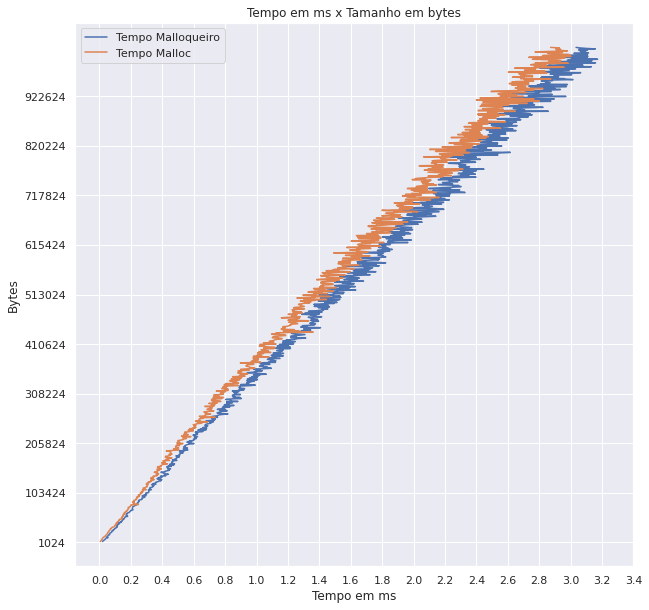

In [4]:
sns.set_theme()
plt.figure(figsize=(10,10), facecolor='white')
plt.plot(df['Tempo Malloqueiro'], df['Tamanho'], label='Tempo Malloqueiro')
plt.plot(df['Tempo Malloc'], df['Tamanho'], label='Tempo Malloc')
plt.title('Tempo em ms x Tamanho em bytes')
plt.xticks(np.arange(0,int(max(df['Tempo Malloqueiro'].max(),df['Tempo Malloc'].max()))+0.6, 0.2))
plt.yticks(np.arange(1024,1024000, 1024)[::100])
plt.ylabel('Bytes')
plt.xlabel('Tempo em ms')
plt.legend()
plt.savefig('resultados/grafico_1.png', dpi=1500)
plt.show()